(-0.5, 1386.5, 979.5, -0.5)

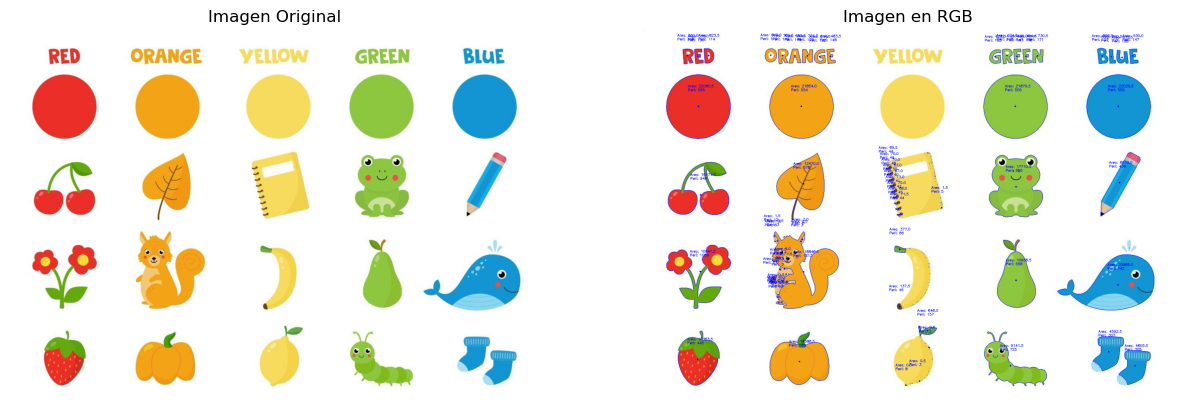

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('colores.jpg')

imagen2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, umbral = cv2.threshold(gris, 200, 255, cv2.THRESH_BINARY_INV)

contornos, Tipo = cv2.findContours(umbral, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


for i, contar in enumerate(contornos):
    momento = cv2.moments(contar)
    if momento["m00"] != 0:
        cX = int(momento["m10"] / momento["m00"]) 
        cY = int(momento["m01"] / momento["m00"])  
    else:
        cX, cY = 0, 0

    area = cv2.contourArea(contar)


    perimetro = int(cv2.arcLength(contar, True))
    

    cv2.putText(imagen2, "Area: " + str(area), (cX - 27, cY-50), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 0, 255), 1) 
    cv2.putText(imagen2, "Peri: " + str(perimetro), (cX-27 , cY-40), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 0, 255), 1)

    cv2.circle(imagen2, (cX, cY), 2, (0, 0, 255), -1)

    cv2.drawContours(imagen2, [contar], -1, (0, 0, 255), 1)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Imagen en RGB')
plt.imshow(imagen2)
plt.axis('off')

2.- Captura una imagen de tu rostro con tu dispositivo móvil y aplica:  
1. Una umbralización  
2. Cambio de color 
3. Convolución con kernel propio 
4. Convolución con kernel predefinido (el de tu preferencia) 
5. Selecciona tu ojo izquierdo en la imagen y aplícale canny  
6. Aplica el filtro de neblina  
7. Detecta los bordes de la imagen  
8. Identifica el área, perímetro y centroide de la imagen  
9. El objeto seleccionado inscríbelo dentro de un cuadro de color rosa

Text(0.5, 1.0, 'Bordes')

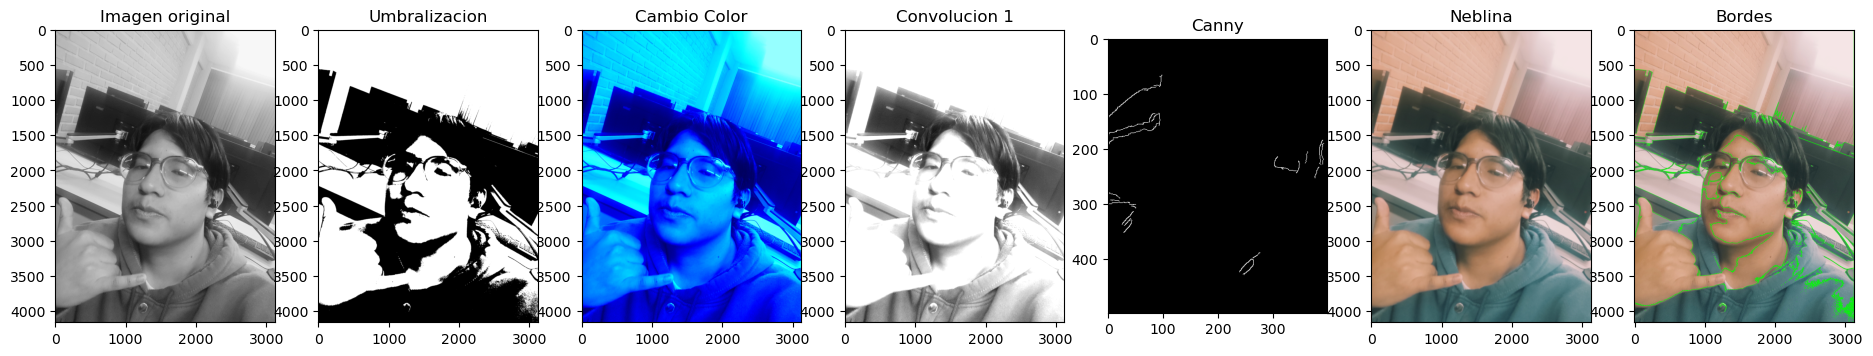

In [2]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

def contar(img):
    img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, binaria = cv2.threshold(img_gris, 127, 255, cv2.THRESH_BINARY)
    borde, _ = cv2.findContours(binaria, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cont = len(borde)
    
    # Draw contours on the original image
    img_contours = cv2.drawContours(img.copy(), borde, -1, (0, 255, 0), 3)

    return cont, img_contours, binaria


imagen = cv2.imread('yo.jpeg',0)

img2 = cv2.imread('yo.jpeg')

imagen2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

#Esta es la umbralizacion binaria 
_,umbralbi = cv2.threshold(imagen,127,255,cv2.THRESH_BINARY)

#Cambio de color 
aplicando = cv2.applyColorMap(imagen,cv2.COLORMAP_HOT)

#Convolución con kernel propio 


#Convolución con kernel predefinido (el de tu preferencia)
mascara = np.array([[1,-1,1],[-1,2,-1],[1,-1,1]])
imgfin = cv2.filter2D(imagen,-1,mascara)

#Selecciona tu ojo izquierdo en la imagen y aplícale canny
ojo_izquierdo = (imagen2[1700:2200,1000:1400,:])
bordes_canny = cv2.Canny(ojo_izquierdo, 100, 200)

#Aplica el filtro de neblina  
imagen_desenfocada = cv2.GaussianBlur(imagen2, (41, 41), 0)
neblina = cv2.addWeighted(imagen2, 0.3, imagen_desenfocada, 0.7, 0)

#Detecta los bordes de la imagen  
img_cont, img_with_contours, img_binary = contar(img2)

#Identifica el área, perímetro y centroide de la imagen 

#El objeto seleccionado inscríbelo dentro de un cuadro de color rosa 


plt.figure(figsize=(30,15))
#Referencia al array de las imagenes
plt.subplot(2,9,1)
plt.imshow(imagen,cmap='gray')
plt.title('Imagen original')

plt.subplot(2,9,2)
plt.imshow(umbralbi,cmap='gray')
plt.title('Umbralizacion')

plt.subplot(2,9,3)
plt.imshow(aplicando,cmap='gray')
plt.title('Cambio Color')


plt.subplot(2,9,4)
plt.imshow(imgfin,cmap='gray')
plt.title('Convolucion 1')

plt.subplot(2,9,5)
plt.imshow(bordes_canny,cmap='gray')
plt.title('Canny')

plt.subplot(2,9,6)
plt.imshow(neblina)
plt.title('Neblina')

plt.subplot(2,9,7)
plt.imshow(cv2.cvtColor(img_with_contours, cv2.COLOR_BGR2RGB))
plt.title('Bordes')

